# Pymaceuticals Inc.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Munging

In [3]:
trial = pd.read_csv('clinicaltrial_data.csv')
mice = pd.read_csv('mouse_drug_data.csv')
combined = trial.merge(mice, how='outer')
print(combined.Drug.unique())
combined.head(20)

['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Propriva' 'Zoniferol' 'Placebo' 'Ceftamin']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Volume Over Time

In [207]:
timepoints = combined.Timepoint.unique()
drugs = combined.Drug.unique()
tumor_volume = pd.DataFrame(index = timepoints, columns = drugs)
tumor_volume_sem = pd.DataFrame(index = timepoints, columns = drugs)

for drug in drugs:
    tumor_volume[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Tumor Volume (mm3)'].mean() for time in timepoints]
    tumor_volume_sem[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Tumor Volume (mm3)'].sem() for time in timepoints]
    
tumor_volume.index.name = 'Timepoints'
tumor_volume.columns.name = 'Drugs'
      
tumor_volume_sem.head(10)



,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.264819,0.202385,0.235102,0.239862,0.482955,0.231708,0.188950,0.218091,0.164505
10,0.702684,0.357421,0.319415,0.282346,0.433678,0.720225,0.376195,0.263949,0.402064,0.236144
15,0.838617,0.580268,0.444378,0.357705,0.493261,0.770432,0.466109,0.370544,0.614461,0.332053
20,0.909731,0.726484,0.595260,0.476210,0.621889,0.786199,0.555181,0.533182,0.839609,0.359482
25,0.881642,0.755413,0.813706,0.550315,0.741922,0.746991,0.577401,0.602513,1.034872,0.439356
30,0.934460,0.934121,0.975496,0.631061,0.899548,0.864906,0.746045,0.800043,1.218231,0.490620
35,1.052241,1.127867,1.013769,0.984155,1.003186,0.967433,1.084929,0.881426,1.287481,0.692248
40,1.223608,1.158449,1.118567,1.055220,1.410435,1.128445,1.564779,0.998515,1.370634,0.708505
45,1.223977,1.453186,1.416363,1.144427,1.576556,1.226805,1.888586,1.003576,1.351726,0.902358


### Plotting Function

In [284]:
def plot_func(df, errors, title, y_label):#error_q is a boolean that determines whether the function adds
    # error bars since not all of our plots can support them
    drugs_array = [[drugs[0],drugs[1],drugs[8],drugs[2]], \
               [drugs[3],drugs[4],drugs[8]], \
               [drugs[5],drugs[6],drugs[8]],\
               [drugs[7],drugs[9],drugs[8]]]
#list of lists for our separate plots
    for i in range(1,5):
        plt.figure()
        sns.set_style("dark")
        for drug in df[drugs_array[i-1]]:
            if type(errors) == bool:
                plt.scatter(df.index.values, df[drug])
            else:
                plt.errorbar(df.index.values, df[drug], yerr= errors[drug], fmt='o', elinewidth=3)
        plt.legend(drugs_array[i-1])      
        plt.title(title)
        plt.xlabel('Time (Days)')
        plt.ylabel(y_label)
    
    return

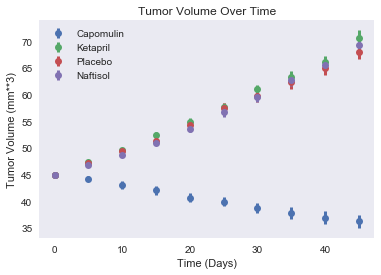

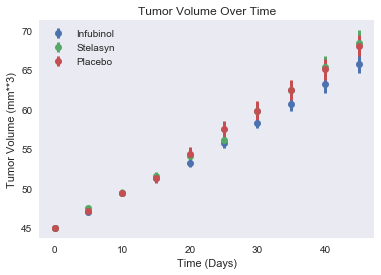

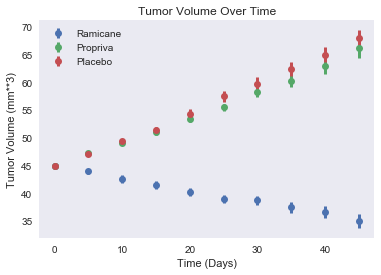

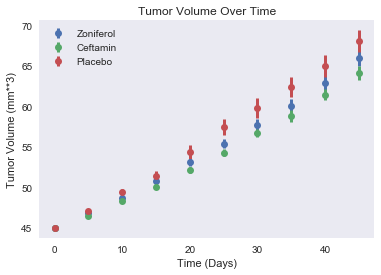

In [285]:
plot_func(tumor_volume, tumor_volume_sem,'Tumor Volume Over Time','Tumor Volume (mm**3)')

Just a heads up, I broke these into four separate plots to be a little more aesthetic. According to this data, the only two drugs that statistically outperform the placebo are Capomulin and Ramicane. You may notice in the first plot that in the top right corner the drugs Naftisol and Ketapril appear to be making the mouse sicker! This is not the case, because the error bars are too close together. This is statistical variation in the mice.

## Metastatic Sites Over Time

In [333]:
metastatic_sites = pd.DataFrame(index = timepoints, columns = drugs)
metastatic_sites_sem = pd.DataFrame(index = timepoints, columns = drugs)
for drug in drugs:
    metastatic_sites[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Metastatic Sites'].mean() for time in timepoints]
    metastatic_sites_sem[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Metastatic Sites'].sem() for time in timepoints]
metastatic_sites.index.name = 'Timepoints'
metastatic_sites.columns.name = 'Drugs'    
metastatic_sites.head(10)



Drugs,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoints,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.304348,0.260870,0.280000,0.240000,0.120000,0.320000,0.166667,0.375000,0.380952
10,0.320000,0.590909,0.523810,0.666667,0.478261,0.250000,0.565217,0.500000,0.833333,0.600000
15,0.375000,0.842105,0.857143,0.904762,0.782609,0.333333,0.764706,0.809524,1.250000,0.789474
20,0.652174,1.210526,1.150000,1.050000,0.952381,0.347826,1.000000,1.294118,1.526316,1.111111
25,0.818182,1.631579,1.500000,1.277778,1.157895,0.652174,1.357143,1.687500,1.941176,1.500000
30,1.090909,2.055556,2.066667,1.588235,1.388889,0.782609,1.615385,1.933333,2.266667,1.937500
35,1.181818,2.294118,2.266667,1.666667,1.562500,0.952381,2.300000,2.285714,2.642857,2.071429
40,1.380952,2.733333,2.466667,2.100000,1.583333,1.100000,2.777778,2.785714,3.166667,2.357143


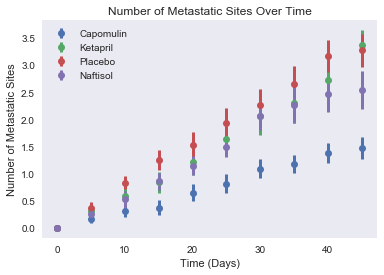

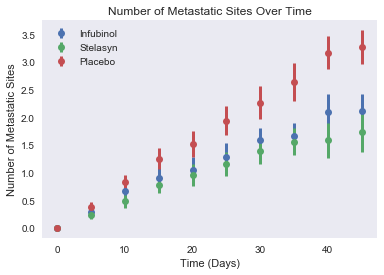

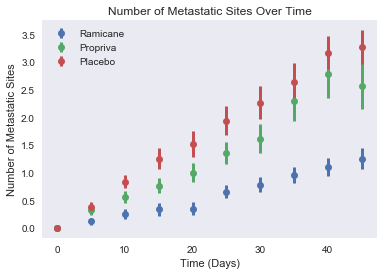

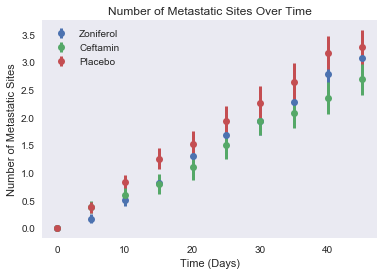

In [287]:
plot_func(metastatic_sites,metastatic_sites_sem,'Number of Metastatic Sites Over Time','Number of Metastatic Sites')

It looks like the error bars on this are much larger as compared with the last plots. This can be explained because of greater variance among this set of data. It appears that Infubinol and Stelasyn appear to be a bit better than the placebo at preventing test

## Survival Rate

In [236]:
survival = pd.DataFrame(index = timepoints, columns = drugs)
for drug in drugs:
    survival[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Mouse ID'].count() for time in timepoints]
survival.index.name = 'Timepoints'
survival.columns.name = 'Drugs'
#error bars aren't possible because this is a count of mice, not average of data
for drug in drugs:
    survival[drug] = (survival[drug]/survival.iloc[0][drug])*100
print(survival.iloc[0]['Capomulin'])
survival.head(10)

100.0


Drugs,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoints,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.0,100.0
5,100.0,92.0,92.0,100.0,96.153846,100.0,96.153846,96.0,96.0,84.0
10,100.0,88.0,84.0,84.0,88.461538,96.0,88.461538,88.0,96.0,80.0
15,96.0,76.0,84.0,84.0,88.461538,96.0,65.384615,84.0,80.0,76.0
20,92.0,76.0,80.0,80.0,80.769231,92.0,65.384615,68.0,76.0,72.0
25,88.0,76.0,72.0,72.0,73.076923,92.0,53.846154,64.0,68.0,72.0
30,88.0,72.0,60.0,68.0,69.230769,92.0,50.000000,60.0,60.0,64.0
35,88.0,68.0,60.0,48.0,61.538462,84.0,38.461538,56.0,56.0,56.0
40,84.0,60.0,60.0,40.0,46.153846,80.0,34.615385,56.0,48.0,56.0


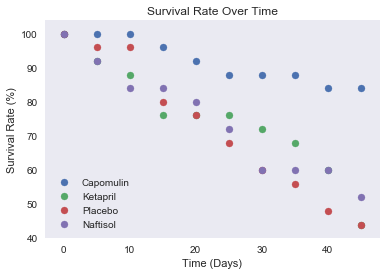

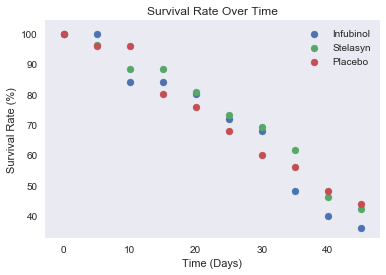

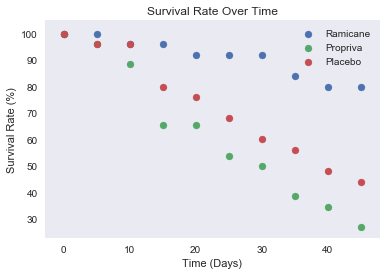

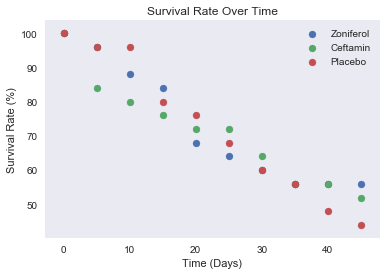

In [288]:
plot_func(survival,False,'Survival Rate Over Time','Survival Rate (%)')

## Percentage Tumor Volume Change Per Drug

In [325]:
tumor_delta = pd.DataFrame(index = drugs, columns = ['% Change in Volume'])
tumor_delta['% Change in Volume'] = [(tumor_volume.iloc[9][drug]-tumor_volume.iloc[0][drug])/tumor_volume.iloc[0][drug] for drug in drugs]                        
                           
# it's true I could just use 45 instead of calling tumor_volume.iloc[0][drug] in my list comprehension
# I figure it's better programming


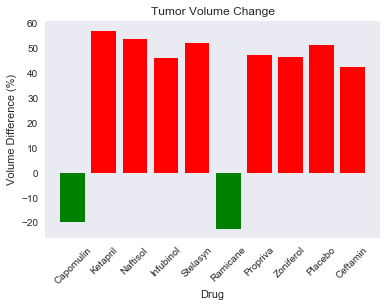

In [328]:
tumor_delta = pd.DataFrame(index = drugs, columns = ['% Change in Volume'])
tumor_delta['% Change in Volume'] = [(tumor_volume.iloc[9][drug]-tumor_volume.iloc[0][drug])/tumor_volume.iloc[0][drug] for drug in drugs]                        
                           
# it's true I could just use 45 instead of calling tumor_volume.iloc[0][drug] in my list comprehension
# I figure it's better programming

plt.bar(tumor_delta.index, tumor_delta[tumor_delta > 0]['% Change in Volume']*100, color ='red')
plt.bar(tumor_delta.index, tumor_delta[tumor_delta < 0]['% Change in Volume']*100, color ='green')
plt.title('Tumor Volume Change')
plt.xlabel('Drug')
plt.ylabel("Volume Difference (%)")
sns.set_style('dark')
plt.xticks(rotation=45);
